Clasificación usando máquinas de soporte vectorial (SVMs)
===

* 14:18 min | Última modificación: Abril 14, 2021 | [YouTube](https://youtu.be/F39pszFwHCM)

Las máquinas de soporte vectorial son modelos de redes neuronales artificiales comunmente usados para la solución de problemas de regresión y clasficación. En esta lección se discute su fundamentación teórica y se ejemplifica su uso en un problema artificial de tres clases linealmente separables.

## Definición del problema

Se tiene una muestra de 150 ejemplos, con dos variables independientes y tres clases; cada clase tiene 50 ejemplos. Se desea construir un sistema clasificador que permita discriminar a que clase pertenece un nuevo patrón. Los ejemplos son generados artificialmente a continuación.

In [1]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

En la siguiente gráfica cada color representa una clase diferente.

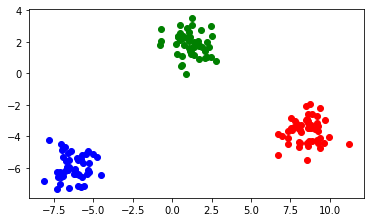

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

## Modelo matemático

Una máquina de soporte vectorial es un modelo matemático de la siguiente forma:

$$
y = w_0 + \sum_d w_d \times k(\mathbf{x}, \mathbf{x}_d)
$$

donde:

* $w_0$ es una constante.

* $\mathbf{x}$ es el vector de variables independientes (valor para el cual se desea calcular la salida $y$.

* $w_d$ son los coeficientes del modelo.

* $\mathbf{x}_d$ son los vectores de soporte.

* $k()$ es una función de núcleo (kernel function).

* $d=1,...,D$ es un índice que itera sobre el conjunto de vectores de soporte.

Los funciones kernel $k()$ son las siguientes:

* Lineal:
$$
k(\mathbf{x}, \mathbf{z}) = \sum_i x_i \cdot z_i
$$

* Polinomial:
$$
k(\mathbf{x}, \mathbf{z}) = 1 + \left( \sum_i x_i \cdot z_i \right)^d
$$
donde el grado $d$ del polinomio debe ser especificado por el modelador.

* RBF:
$$
k(\mathbf{x}, \mathbf{z}) = \exp( -\gamma \cdot ||\mathbf{x} - \mathbf{z}||^2)
$$
con $\gamma > 0$.

* Sigmoid:
$$
k(\mathbf{x}, \mathbf{z}) = \tanh \left(r + \gamma \sum_i x_i \cdot y_i \right)
$$

La estimación de los parámetros del modelo y la correspondiente selección de los vectores de soporte se realiza mediante la minimización de la función de riesgo regularizado de la forma (ver https://scikit-learn.org/stable/notebooks/svm.html#svm-mathematical-formulation):
$$
R(C, \epsilon) = C \sum_i \text{loss}(d_i, y_i) + \sum_d w_d^2
$$

La función de pérdida utilizada depende del tipo de implementación.

## Solución numérica

In [3]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=1)  # tipo de kernel  # factor de regularización

clf.fit(X, d)
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Fronteras de decisión

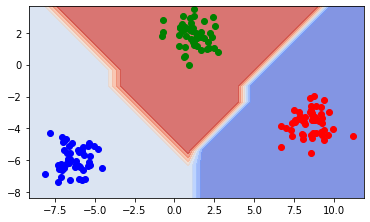

In [4]:
import numpy as np

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 1),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 1),
)

zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")

plt.gca().set_aspect("equal", adjustable="box")
plt.gca().set_xlim(xx.min(), xx.max())
plt.gca().set_ylim(yy.min(), yy.max());

**Ejercicio.---** Experimente con otras funciones de nucleo.